In [1]:
# 単回帰モデルに関する例題
library(rstan)
library(brms)

rstan_options(auto_write=TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: Rcpp

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Loading 'brms' package (version 2.10.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:rstan’:

    loo




In [2]:
# 中身を確認
head(iris, n=3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
# サンプル数の確認
sample_size <- nrow(iris)
sample_size

[1] 150

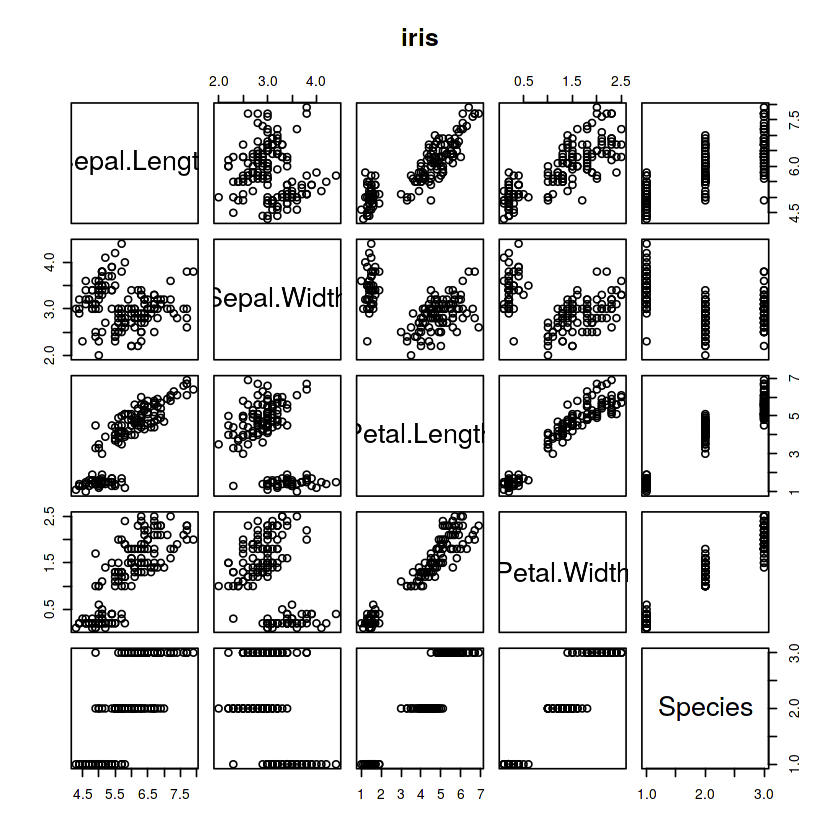

In [4]:
# サンプルの分布について確認
plot(iris, main = "iris")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




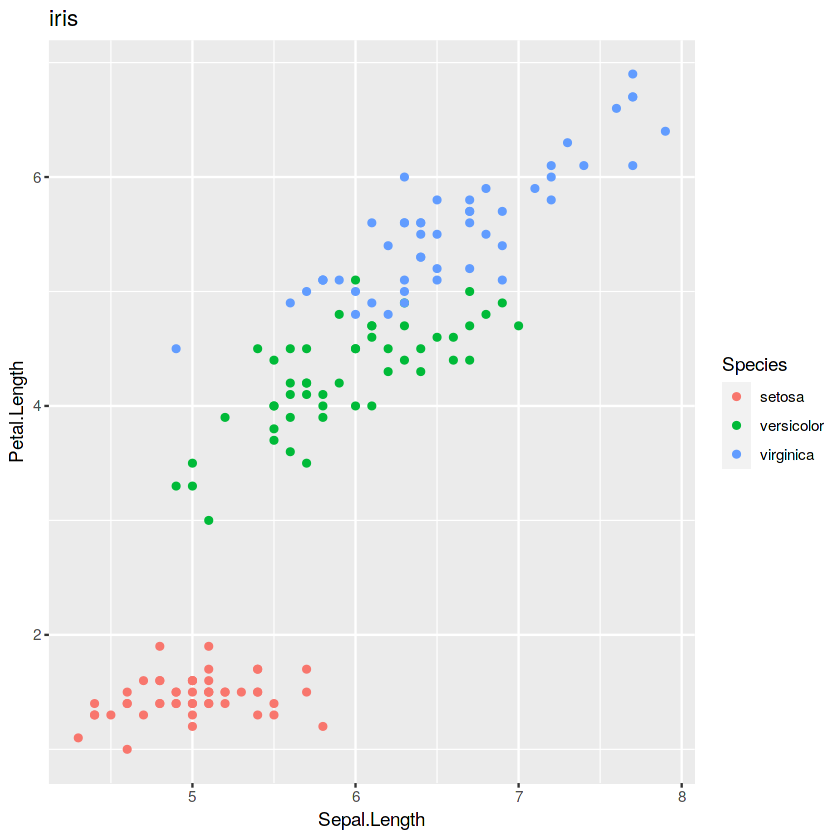

In [5]:
# 使用する列を選択
library(dplyr)
df <- select(.data = iris,  Species, Sepal.Length	, Petal.Length)
ggplot(data=iris, mapping = aes(x=Sepal.Length	, y=Petal.Length)) + geom_point(aes(color = Species)) + labs(title="iris")

In [9]:
lm_brms <- brm(
    formula = Petal.Length ~ Sepal.Length + Species,
    family = gaussian(),
    data = df,
    seed = 1,
    prior = c(
        set_prior("", class="Intercept"),
        set_prior("", class="sigma")        
    )
)

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling



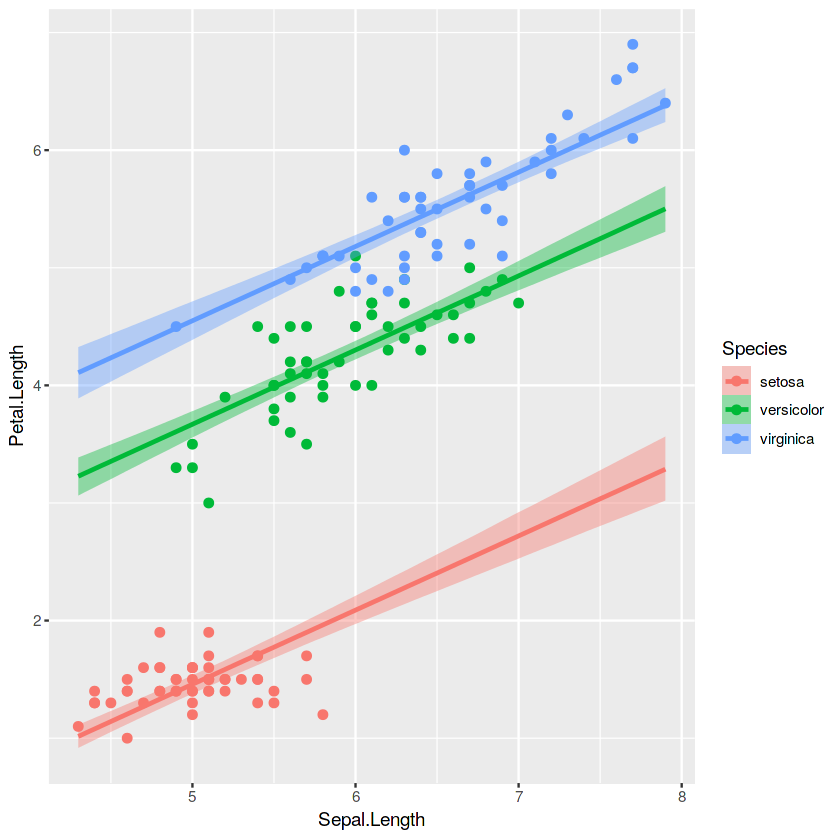

In [10]:
eff <- marginal_effects(lm_brms, effects="Sepal.Length:Species")
plot(eff, points = TRUE)

ERROR: Error: All specified effects are invalid for this model.
Valid effects are (combinations of): 'Sepal.Length', 'Species'
